### Coding Discussion 4
Carmen Wang 

In [1]:
#Preparation 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
#read text file
fox = open('fox-khashoggi.txt', 'r', encoding = "UTF-8").read()
cnn = open('cnn-khashoggi.txt','r',encoding = "UTF-8").read()
b = open('breitbart-khashoggi.txt','r',encoding = "UTF-8").read()
bbc = open('bbc-khashoggi.txt', 'r',encoding = "UTF-8").read()
a = open('aljazeera-khashoggi.txt','r',encoding = "UTF-8").read()

In [3]:
#read stop words
stop = pd.read_csv('stop_words.csv')
#convert to list 
stopwords = stop.word.tolist()

In [4]:
#tokenize the text
def text_converter(text=None):
    '''
    The function convert a text to a dataframe
    Argument: input text (A long string)
    Return: dataframe of word count 
    '''
    
    text = text.lower()
    #remove punctuation
    text = re.sub(r'[^\w\s]', '', text) 
    text_list = text.split()
    #remove stop words
    text_without_sw = [word for word in text_list if not word in stopwords]
    #then convert to a data frame
    d = dict()
    for word in text_without_sw:
        if word in d:
            d[word][0] += 1
        else:
            d[word] = [1]
    return pd.DataFrame(d)

In [5]:
#put dataframes together 
def gen_DTM(texts=None):
    '''
    Generate a document term matrix
    Argument: text
    Return: A DTM for a list of texts
    '''
    
    DTM = pd.DataFrame()
    for text in texts:
        entry = text_converter(text)
        DTM = DTM.append(pd.DataFrame(entry),ignore_index=True,sort=True) # Row bind
    DTM.fillna(0, inplace=True) # Fill in any missing values with 0
    return DTM

In [6]:
DTM = gen_DTM([a,bbc,b,cnn,fox])
DTM

,1,108,11,12,15,15member,18,2,28,2r,...,weeks,white,widely,withheld,woods,world,worse,writer,yalova,yelova
0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0


In [7]:
#change the index names
DTM.rename(index = {0:'aljazeera',1:'bbc',2:'breitbart',3:'cnn',4:'fox'}, inplace = True)

In [8]:
DTM

,1,108,11,12,15,15member,18,2,28,2r,...,weeks,white,widely,withheld,woods,world,worse,writer,yalova,yelova
aljazeera,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bbc,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
breitbart,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
cnn,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
fox,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0


In [9]:
#calculate cosine 
def cosine(a,b):
    '''
    This function calculates the cosine between two input vectors
    Arguments:
        a: first vector
        b: second vector
    returns: the cosine(similarity) between two vectors
             rounded to 4 decimal places 
    '''
    cos = np.dot(a,b)/(np.sqrt(np.dot(a,a)) * np.sqrt(np.dot(b,b)))
    return round(cos,4)

In [10]:
#create a table to display the consine 

idx = ['aljazeera', 'bbc', 'breitbart', 'cnn', 'fox']

similarity = pd.DataFrame(index = idx, columns = idx)
for i in similarity.index:
    for c in similarity.columns:
        similarity.loc[i,c] = cosine(DTM.loc[i].values,DTM.loc[c])

In [11]:
similarity

,aljazeera,bbc,breitbart,cnn,fox
aljazeera,1,0.6789,0.598,0.5331,0.6952
bbc,0.6789,1,0.5963,0.5039,0.6455
breitbart,0.598,0.5963,1,0.3771,0.5528
cnn,0.5331,0.5039,0.3771,1,0.5341
fox,0.6952,0.6455,0.5528,0.5341,1


Text(0.5, 1.0, 'Cosine between new sources')

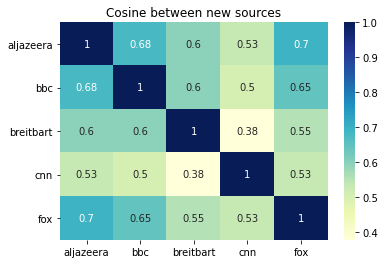

In [12]:
#visualize to identify the pattern
ax = plt.axes()
sns.heatmap(similarity.astype(float), annot = True, cmap = 'YlGnBu')
ax.set_title('Cosine between new sources')

In [13]:
# Without the removal of stop words 

def text_converter2(text=None):
    '''
    The function convert a text to a dataframe
    Argument: input text (A long string)
    Return: dataframe of word count 
    '''
    
    text = text.lower()
    #remove punctuation
    text = re.sub(r'[^\w\s]', '', text) 
    text_list = text.split()
    #then convert to a data frame
    d = dict()
    for word in text_list:
        if word in d:
            d[word][0] += 1
        else:
            d[word] = [1]
    return pd.DataFrame(d)

#put dataframes together 
def gen_DTM2(texts=None):
    '''
    Generate a document term matrix
    Argument: text
    Return: A DTM for a list of texts
    '''
    
    DTM = pd.DataFrame()
    for text in texts:
        entry = text_converter2(text)
        DTM = DTM.append(pd.DataFrame(entry),ignore_index=True,sort=True) # Row bind
    DTM.fillna(0, inplace=True) # Fill in any missing values with 0
    return DTM

DTM2 = gen_DTM2([a,bbc,b,cnn,fox])

DTM2.rename(index = {0:'aljazeera',1:'bbc',2:'breitbart',3:'cnn',4:'fox'}, inplace = True)

#create a table to display the consine 
similarity2 = pd.DataFrame(index = idx, columns = idx)
for i in similarity2.index:
    for c in similarity2.columns:
        similarity2.loc[i,c] = cosine(DTM2.loc[i].values,DTM2.loc[c])


Text(0.5, 1.0, 'Cosine between news sources without removing stopwords')

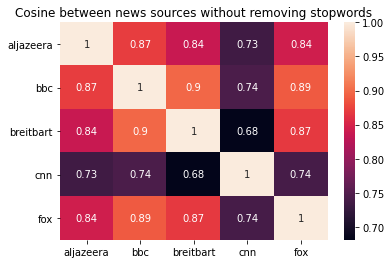

In [14]:
#visualize the cosine table
#without removing stopwords
ax = plt.axes()
sns.heatmap(similarity2.astype(float),annot = True)
ax.set_title('Cosine between news sources without removing stopwords')

### Discussion

Generally speaking, these sources report the news in a similar way, as most of the similarities are above 0.5, with an exception between CNN and Breitbart. 
From the visualization above, we can see that between Aljazeera and Fox there occurs the most similarity. The similarity is 0.7. The least similarity of 0.38 occurs between CNN and Breitbart. 

Without the removal of stop words, we can see a large increase in similarity. The most similar sources are BBC and Breitbart. And the least similarity still occurs between CNN and Breitbart. 